## Подготовка данных

In [5]:
import os
from analyze import *
import spacy

In [6]:
dataset_filename = os.path.join("..", "data", "news_dataset.json")

# Если датасет не существует – генерируем его
if not os.path.exists(dataset_filename):
    generate_news_dataset(filename=dataset_filename)
else:
    print(f"Файл {dataset_filename} уже существует. Пропускаем генерацию.")

# Загружаем данные из JSON в DataFrame
with open(dataset_filename, "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)

Файл ../data/news_dataset.json уже существует. Пропускаем генерацию.


## Анализ текста

Общее количество статей: 4446

Статистика по длине текстов (в словах):
count    4446.000000
mean       30.700855
std        31.487638
min         1.000000
25%        19.000000
50%        26.000000
75%        33.000000
max       322.000000
Name: text_length, dtype: float64

Статистика по длине заголовков (в словах):
count    4446.000000
mean        8.065452
std         3.140574
min         3.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        16.000000
Name: title_length, dtype: float64


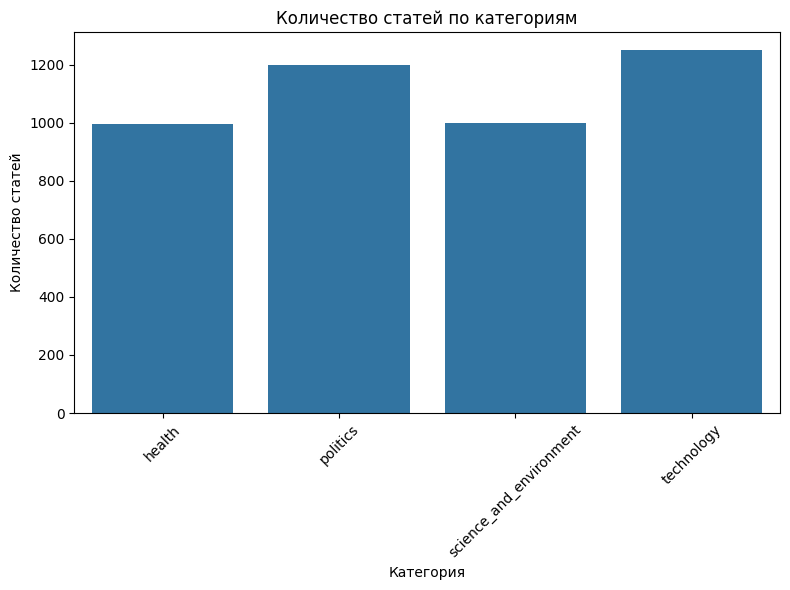

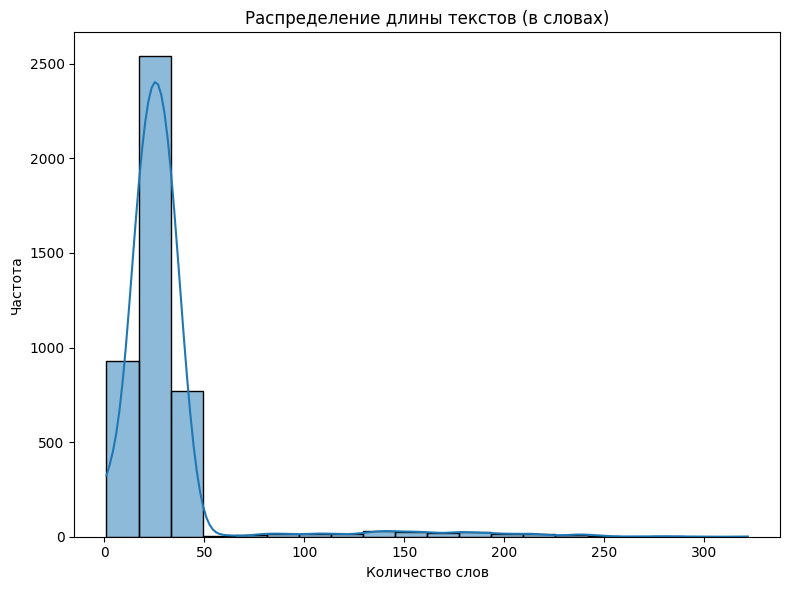

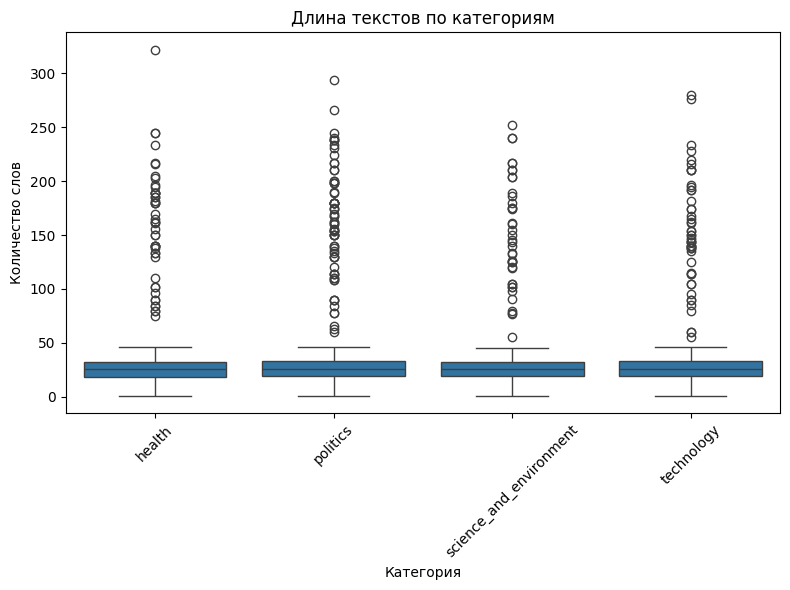

In [7]:
# Базовый анализ данных
basic_text_analysis(df)

In [8]:
# Загрузка модели spaCy (en_core_web_sm)
try:
    nlp = spacy.load("en_core_web_sm")
except Exception as e:
    print("Ошибка загрузки модели spaCy. Убедитесь, что en_core_web_sm установлен.")


Предобработка текстов (токенизация, лемматизация, удаление стоп-слов и пунктуации)...

Категория: health
Общее число слов: 24179
Число уникальных слов: 834
Коэффициент разнообразия (уникальные/все): 0.034
Топ-10 ключевых слов:
  feel: 74
  include: 73
  capital: 67
  rule: 60
  wrong: 59
  leave: 57
  cup: 56
  chair: 55
  attack: 54
  conference: 54


/home/user/projects/nlp_hse_lab/src/analyze.py:213: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_list), y=list(freq_list), palette="magma")


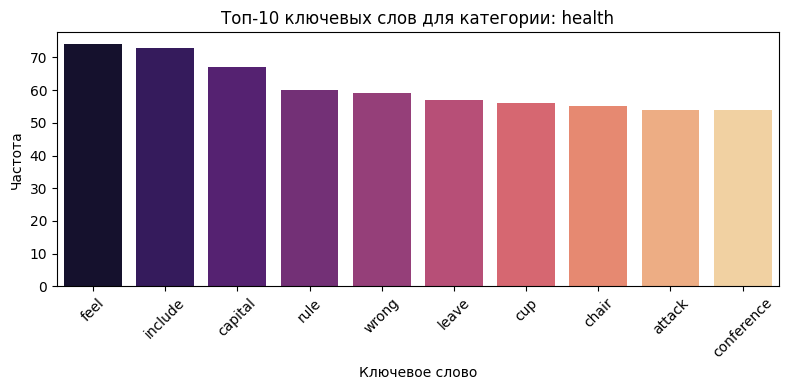


Категория: politics
Общее число слов: 31037
Число уникальных слов: 827
Коэффициент разнообразия (уникальные/все): 0.027
Топ-10 ключевых слов:
  include: 90
  position: 81
  arrive: 78
  wrong: 75
  good: 74
  think: 74
  body: 70
  special: 69
  feel: 69
  area: 68


/home/user/projects/nlp_hse_lab/src/analyze.py:213: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_list), y=list(freq_list), palette="magma")


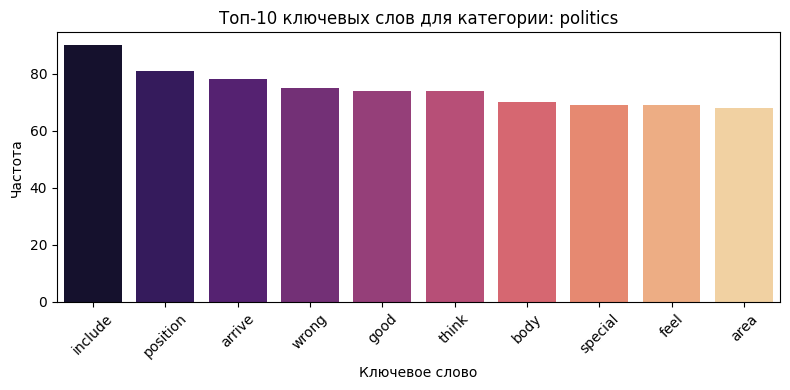


Категория: science_and_environment
Общее число слов: 23245
Число уникальных слов: 831
Коэффициент разнообразия (уникальные/все): 0.036
Топ-10 ключевых слов:
  feel: 82
  think: 65
  single: 59
  church: 59
  right: 58
  evidence: 58
  include: 57
  daughter: 57
  scientist: 55
  worker: 54


/home/user/projects/nlp_hse_lab/src/analyze.py:213: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_list), y=list(freq_list), palette="magma")


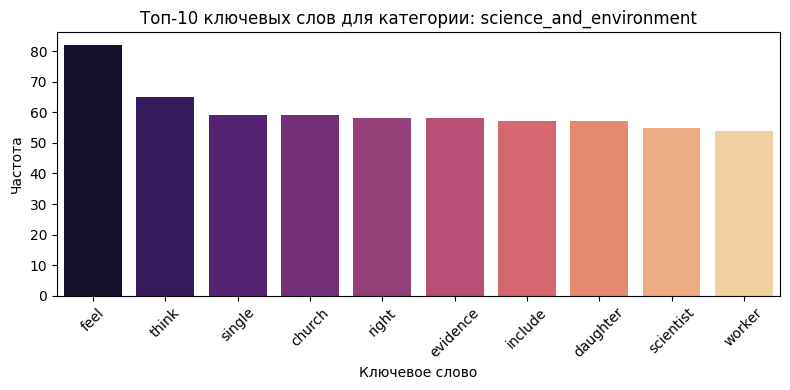


Категория: technology
Общее число слов: 29389
Число уникальных слов: 848
Коэффициент разнообразия (уникальные/все): 0.029
Топ-10 ключевых слов:
  think: 78
  include: 68
  wrong: 67
  leave: 67
  expert: 67
  lose: 66
  magazine: 64
  agency: 63
  feel: 63
  good: 61


/home/user/projects/nlp_hse_lab/src/analyze.py:213: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words_list), y=list(freq_list), palette="magma")


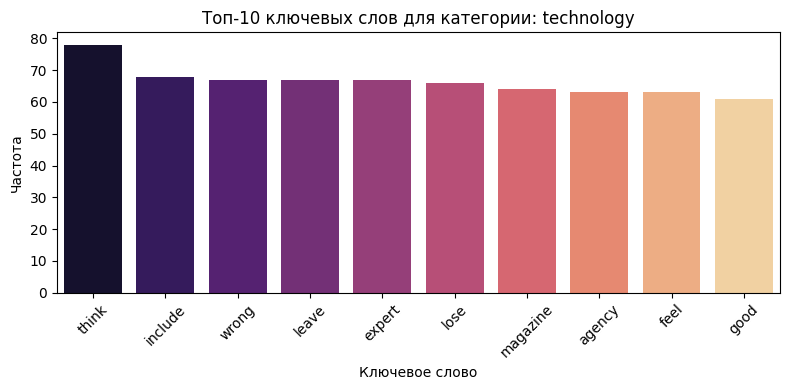

/home/user/projects/nlp_hse_lab/src/analyze.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=ratios, palette="viridis")


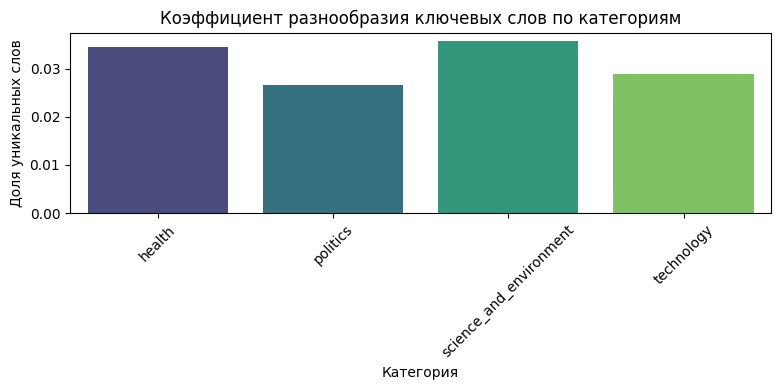

In [9]:
print("\nПредобработка текстов (токенизация, лемматизация, удаление стоп-слов и пунктуации)...")
processed_texts = preprocess_texts(df["text"], nlp)

# Анализ ключевых слов по категориям
analyze_keywords_by_category(df, processed_texts)

## Выводы